In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import math 

print(tf.__version__)

1.8.0


Declaration of functions

In [4]:
df = pd.read_csv('df_idade_risco_escolaridade_final.csv', sep=',')

Shuffling

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head()

Unnamed: 0  municipio    lat   long  num_homicidio_escolaridade   idhm  \
0       20497  GUARULHOS -23.46 -46.53                           5  0.763   
1      160988     OSASCO -23.53 -46.79                           1  0.776   
2       15984  GUARULHOS -23.46 -46.53                           8  0.763   
3       63629  GUARULHOS -23.46 -46.53                           8  0.763   
4       78457  GUARULHOS -23.46 -46.53                           8  0.763   

        pib  pop_total  pop_mulher  idade  Feminino  coeficiente_feminicidio  \
0  30383.43    1221979      626936      4       0.1                      3.2   
1  54599.81     666740      346304     41       1.4                      2.2   
2  30383.43    1221979      626936     27       2.7                      3.2   
3  30383.43    1221979      626936     44       1.7                      3.2   
4  30383.43    1221979      626936     49       1.1                      3.2   

   escolaridade_classif  probIdade   probMun   probTot  factRisco  
0                 0.284      0.001  0.117216  0.000117   2.777778  
1                 0.142      0.014  0.080586  0.001128  26.736111  
2                 0.710      0.027  0.117216  0.003165  75.000000  
3                 0.710      0.017  0.117216  0.001993  47.222222  
4                 0.710      0.011  0.117216  0.001289  30.555556

In [7]:
split = 0.8
i_split = int(len(df) * split)

In [11]:
header_names = ["lat","long","idade", "idhm", "pib", "escolaridade_classif"]

In [12]:
label_name = ['factRisco']

In [13]:
train_data = df.get(header_names).values[:i_split]

In [14]:
train_label = df.get(label_name).values[:i_split]

In [15]:
test_data = df.get(header_names).values[i_split:]

In [16]:
test_label = df.get(label_name).values[i_split:]

In [17]:
len(train_data) - len(train_label)

0

In [18]:
len(test_data) - len(test_label)

0

In [19]:
train_data

array([[-2.346000e+01, -4.653000e+01,  4.000000e+00,  7.630000e-01,
         3.038343e+04,  2.840000e-01],
       [-2.353000e+01, -4.679000e+01,  4.100000e+01,  7.760000e-01,
         5.459981e+04,  1.420000e-01],
       [-2.346000e+01, -4.653000e+01,  2.700000e+01,  7.630000e-01,
         3.038343e+04,  7.100000e-01],
       ...,
       [-2.346000e+01, -4.653000e+01,  3.100000e+01,  7.630000e-01,
         3.038343e+04,  4.260000e-01],
       [-2.346000e+01, -4.653000e+01,  7.000000e+00,  7.630000e-01,
         3.038343e+04,  2.840000e-01],
       [-2.346000e+01, -4.653000e+01,  4.500000e+01,  7.630000e-01,
         3.038343e+04,  2.840000e-01]])

In [20]:
train_label

array([[ 2.77777778],
       [26.73611111],
       [75.        ],
       ...,
       [80.55555556],
       [ 2.77777778],
       [30.55555556]])

In [21]:
test_data

array([[-2.353000e+01, -4.679000e+01,  5.700000e+01,  7.760000e-01,
         5.459981e+04,  5.680000e-01],
       [-2.346000e+01, -4.653000e+01,  5.800000e+01,  7.630000e-01,
         3.038343e+04,  4.260000e-01],
       [-2.346000e+01, -4.653000e+01,  3.100000e+01,  7.630000e-01,
         3.038343e+04,  2.840000e-01],
       ...,
       [-2.346000e+01, -4.653000e+01,  4.100000e+01,  7.630000e-01,
         3.038343e+04,  4.260000e-01],
       [-2.346000e+01, -4.653000e+01,  6.900000e+01,  7.630000e-01,
         3.038343e+04,  7.100000e-01],
       [-2.346000e+01, -4.653000e+01,  7.600000e+01,  7.630000e-01,
         3.038343e+04,  2.840000e-01]])

In [22]:
test_label 

array([[13.36805556],
       [13.88888889],
       [80.55555556],
       ...,
       [38.88888889],
       [ 8.33333333],
       [ 5.55555556]])

In [23]:
train_mean = np.mean(train_data, axis=0) 

In [24]:
train_mean

array([-2.34836868e+01, -4.66179796e+01,  3.99854207e+01,  7.67398982e-01,
        3.85778470e+04,  4.89709869e-01])

In [25]:
train_std = np.std(train_data, axis=0)

In [26]:
train_std

array([3.31211730e-02, 1.23021500e-01, 2.33829499e+01, 6.15107499e-03,
       1.14582130e+04, 2.19350918e-01])

In [27]:
train_norm = (train_data - train_mean)/train_std

train_norm

array([[ 0.71515663,  0.71515663, -1.53895983, -0.71515663, -0.71515663,
        -0.93781175],
       [-1.39829509, -1.39829509,  0.04338971,  1.39829509,  1.39829509,
        -1.58517626],
       [ 0.71515663,  0.71515663, -0.55533715, -0.71515663, -0.71515663,
         1.00428178],
       ...,
       [ 0.71515663,  0.71515663, -0.38427233, -0.71515663, -0.71515663,
        -0.29044724],
       [ 0.71515663,  0.71515663, -1.41066122, -0.71515663, -0.71515663,
        -0.93781175],
       [ 0.71515663,  0.71515663,  0.21445452, -0.71515663, -0.71515663,
        -0.93781175]])

In [28]:
test_mean = np.mean(test_data,axis=0)
test_std = np.std(test_data,axis=0)

test_norm = (test_data - test_mean)/test_std

test_norm

array([[-1.40572935, -1.40572935,  0.7248515 ,  1.40572935,  1.40572935,
         0.35803739],
       [ 0.71137449,  0.71137449,  0.76763659, -0.71137449, -0.71137449,
        -0.28952842],
       [ 0.71137449,  0.71137449, -0.38756089, -0.71137449, -0.71137449,
        -0.93709423],
       ...,
       [ 0.71137449,  0.71137449,  0.04029003, -0.71137449, -0.71137449,
        -0.28952842],
       [ 0.71137449,  0.71137449,  1.2382726 , -0.71137449, -0.71137449,
         1.0056032 ],
       [ 0.71137449,  0.71137449,  1.53776824, -0.71137449, -0.71137449,
        -0.93709423]])

Construction of the model and running over the normalized files

In [29]:
def build_model(shape_of_np_array):
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(shape_of_np_array,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  #Definition of the function to minimize (loss function)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

In [30]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('epoch')
    print('.'),



Definition of model and fit call

In [32]:
model = build_model(train_norm.shape[1]) 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

#for con in range(len(mynp_train_super_array)):

#for con in range(3):

EPOCHS = 5

model.fit(train_norm, train_label, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#model.fit_generator(data_gen(1), epochs=EPOCHS, steps_per_epoch = 3, verbose=0, callbacks=[early_stop, PrintDot()])


 epoch
. . . . .

From here is independent of the fit procedure, as long as it produces a model that can predict something

In [33]:
#test_predictions = test_predictions_total/len(mynp_train_super_array)
#test_predictions = test_predictions_total
test_predictions = model.predict(test_norm).flatten()
test_predictions

array([11.375595 , 16.804127 , 80.62524  , ..., 43.02398  ,  7.797941 ,
        6.4398255], dtype=float32)

In [34]:
test_label_flat = test_label.flatten()

In [35]:
len(test_predictions) - len(test_label_flat)

0

In [36]:
test_label_flat

array([13.36805556, 13.88888889, 80.55555556, ..., 38.88888889,
        8.33333333,  5.55555556])

In [37]:
import matplotlib.pyplot as plt

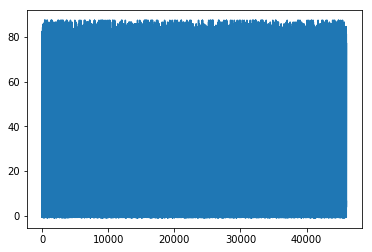

In [38]:
plt.plot(test_predictions)

In [39]:
rel_diff = []
for i in range(len(test_predictions)):
    rel_diff.append((test_predictions[i] - test_label_flat[i])/max([test_predictions[i],test_label_flat[i]]))

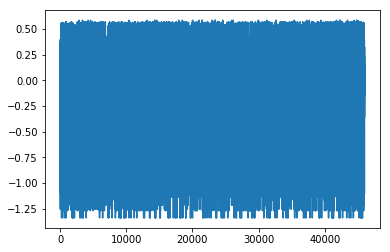

In [40]:
plt.plot(rel_diff)

Os peaks de differenca entre as predicoes e os valores do test podem estar sendo causados pq existem casos de risco 
(muito altos ou muito pequenhos) que tem pouca representacao. No folder V1_test comecamos fazer a optimizacao para 
pesquisar as causas daquelas discrepancas grandes. Porem, em geral pode ser visto que a tendencia da differenca entre 
predicoes e valores reais estam ao redos de zero

In [ ]:
header_names = ["lat","long","idade", "idhm", "pib", "escolaridade_classif"]

In [84]:
lat = -24
lon = -67
ida = 35
idhm = 0.81
pib = 13430.0
escolaridade_classif = 0.15

TODO: we must change from here in order to include new features)

In [85]:
test_mean

array([-2.34835209e+01, -4.66173634e+01,  4.00583161e+01,  7.67368169e-01,
        3.85204494e+04,  4.89488582e-01])

In [91]:
test_mean[1]

-46.617363389462234

In [88]:
lat_norm = (lat - test_mean[0])/test_std[0]
lon_norm = (lon - test_mean[1])/test_std[1]
ida_norm = (ida - test_mean[2])/test_std[2]
idhm_norm = (idhm - test_mean[3])/test_std[3]
pib_norm = (pib - test_mean[4])/test_std[4]
escolaridade_classif_norm = (escolaridade_classif - test_mean[5])/test_std[5]


In [89]:
input = np.array([[lat_norm,lon_norm,ida_norm,idhm_norm,pib_norm,escolaridade_classif_norm]])

In [90]:
input

array([[ -15.62056943, -165.96983944,   -0.21642052,    6.94277017,
          -2.19351888,   -1.54817746]])

In [82]:
Risco = model.predict(input).flatten()

In [83]:
Risco[0]

1602.3745

Reading info from outputs of Google Forms

In [47]:
dict_cor = {"Branca": 0, "Negra" : 1, "Preta": 1, "Indígena": 0.6, "Amarela": 0.2, "Parda": 0.9}
dict_states = {"AC": [-9.97,-67.81], "AP": [0.03, 51.06],"AM":[-3.1,-60.02],
               "PA": [-1.45,-48.5], "RO": [-8.76,-63.9],"RR":[2.82,-60.67],
               "TO": [-10.16,-48.33], "AL": [-9.66,-35.73], "BA":[-12.97,-38.51],
               "CE": [-3.71,-38.54], "MA": [-2.53,-44.3], "PB": [-7.11,-34.86],
               "PE": [-8.05,-34.88], "PI": [-5.08,-42.8], "RN": [-5.79,-35.2],
               "SE": [-10.91,-37.07],"ES": [-20.31,-40.33], "MG": [-19.81,-43.95],
               "RJ": [-22.9,-43.2], "SP": [-23.54,-46.63], "PR": [-25.42,-49.27],
               "RS": [-30.03,-51.23],"SC": [-27.59,-48.54], "DF": [-15.78,-47.93],
               "GO": [-16.67,-49.25], "MT": [-15.59,-56.09], "MS": [-20.44,-54.64]}

In [48]:
df_form = pd.read_csv('../Dados/MeusDados/APP - Ada Pela Paz (Pesquisa).csv', sep=',')

In [49]:
df_form.head()

Timestamp           Username  \
0  2018/12/09 6:21:18 AM GMT-2  elisa@hotmail.com   
1  2018/12/09 6:22:00 AM GMT-2   xuxa@hotmail.com   
2  2018/12/09 6:22:26 AM GMT-2  anita@hotmail.com   
3  2018/12/09 6:22:53 AM GMT-2   tati@hotmail.com   
4  2018/12/09 6:23:18 AM GMT-2   mara@hotmail.com   

  Amiga, em qual estado você vive?  Qual a sua idade?  \
0                               GO                 28   
1                               RJ                 50   
2                               DF                 30   
3                               MG                 17   
4                               CE                 25   

  Qual é a cor ou raça que você se identifica?  
0                                     Indígena  
1                                       Branca  
2                                        Parda  
3                                        Negra  
4                                        Preta

In [50]:
np_form = df_form.values

In [51]:
lat_list = []
lon_list = []

est_list = []
rac_list = []

cor_list = []
ida_list = []
risco_list = []
email_list = []

f = open('RiscoFile.txt','w')


for ele in range(len(np_form)):
    lat_gf = dict_states[np_form[ele][2]][0]
    lon_gf = dict_states[np_form[ele][2]][1]
    cor_gf = dict_cor[np_form[ele][4]]
    ida_gf = np_form[ele][3]
    email_gf = np_form[ele][1]
    
    est_gf = np_form[ele][2]
    rac_gf = np_form[ele][4]
    
    #print(lat_gf, lon_gf, cor_gf, ida_gf)
    
    lat_norm = (lat_gf - test_mean[0])/test_std[0]
    lon_norm = (lon_gf - test_mean[1])/test_std[1]
    cor_norm = (cor_gf - test_mean[2])/test_std[2]
    ida_norm = (ida_gf - test_mean[3])/test_std[3]
    
    input_gf = np.array([[lat_norm,lon_norm,cor_norm,ida_norm]])
    
    #print(input_gf)
    
    risco_gf = model.predict(input_gf).flatten()[0]

    lat_list.append(lat_gf)
    lon_list.append(lon_gf)
    cor_list.append(cor_gf)
    ida_list.append(ida_gf)
    risco_list.append(risco_gf)
    email_list.append(email_gf)
    
    est_list.append(est_gf)
    rac_list.append(rac_gf)

    
dict_df = {'lat': lat_list, 'lon': lon_list, 'cordepele': cor_list, 'idade': ida_list, 
           'facRisco': risco_list, 'email': email_list, 'estado': est_list, 'raca': rac_list}
df_output = pd.DataFrame(data=dict_df) 
df_output.to_csv("DataUsuarios.csv", encoding='utf-8', index=False)

# Pretty print the dataframe as an html table to a file
#intermediate_html = '/tmp/intermediate.html'
#df_output.to_html(intermediate_html)

Retroalimentacao dos dados

In [52]:
ra_header_names = ['lat', 'lon', 'cordepele', 'idade', 'facRisco']

In [64]:
df_old = df.get(ra_header_names)
df_new = df_output.get(ra_header_names)

In [65]:
df_ra = pd.concat([df_old, df_new])

In [66]:
df_ra.to_csv("RetroData.csv", encoding='utf-8', index=False)

Provas